# Data Science Methods for Clean Energy Research 
## *Linear regression*

## Outline

In this tutorial we will look at fitting data to a curve using **regression** - our target output is therefore numerical. Specifically we will look at using **linear regression** to make **predictions** for new data points by dividing our data into a training and a testing set. Finally we will examine how much error we make in our fit and then in our predictions by computing the mean squared error, at the variance and bias.

### 1. Introduction to linear regression

* Simple linear regression with least mean squares

### 2. Example of linear regression 

* Using linear regression to fit the position of a Cheetah

### 3. Accuracy of estimated coefficients

* Standard error and regression score 

### 4. Bias and variance

* Estimating bias and variance on the Cheetah dataset
* Unbiased estimators



---







### Load libraries which will be needed in this Notebook



In [23]:
# Pandas library for the pandas dataframes
import pandas as pd    

# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import numpy 
import numpy as np

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 20})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. What is linear regression? 

It is the process of predicting a **_dependent_** variable _Y_ based on the **_independent_** variable _X_ 

$$Y = f(X) + \epsilon\;\;\;\;\;\sf{eq. 1}$$ 
using a linear function
$$Y \approx \beta_0 + \beta_1 X\;\;\;\;\;\sf{eq. 2}$$

Here $\beta_0$ is the intercept and $\beta_1$ the slope, toghether we refer to these are **_coefficients_** or **_parameters_**. Given that the linear relationship is an assumption and that the coefficients are unknown, once we have trained the model, we will have created an estimator, which can estimate the value of $Y$ for a given observed value $x$:

$$\hat{y} = \hat{\beta}_0+\hat{\beta}_1x\;\;\;\;\;\sf{eq. 3}$$


Now, how do we find the optimal values of the coefficients? 


One way is by minimizing the **residual sum of squares** (RSS). Given a sample of $N$ points $\left\{(x_0,y_0),...,(x_N,y_N)\right\}$, we can write

$${\sf RSS} =\sum_{i=1}^{N}\left(y_i - \hat{y}(x_i)\right)^2 = \sum_{i=1}^{N}\left(y_i - \hat{\beta}_0 -\hat{\beta}_1 x_i  \right)^2\;\;\;\;\sf{eq. 4}$$

One can show that by taking the derivatives of RSS respect to $\hat{\beta}_0$ and $\hat{\beta}_1$ and setting these to zero, the optimal values are

$$\hat{\beta}_1=\frac{\sum_{i=1}^N(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^N(x_i-\bar{x})^2}\;\;\;\;\;\sf{eq. 5}$$

$$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}\;\;\;\;\;\sf{eq. 6}$$

with $\bar{y}=\sum_{i=1}^N\frac{y_i}{N}$ and  $\bar{x}=\sum_{i=1}^N\frac{x_i}{N}$ the sample means.

Let's try this out in python!

## 2.  Linear regression + a Cheetah: fitting with scikit-learn

### Loading the dataset

Consider a Cheetah on the run (worth watching): https://www.youtube.com/watch?v=8-9oFxYFODE
<br>


![Image of Cheetah](https://drive.google.com/uc?export=view&id=1lpZinFnWbbreZxx2BxpldWPVBlAyUL89)

Assume you have a set of data with values (time, position, speed, energy) for one Cheetah's motion. The dataset is in csv format, lets load it by using the <code> Pandas </code> library - the name of the file is <code> running_cheetah.csv </code>


In [24]:
# Load the dataset using the read_csv() pandas function - we have to indicate that
# the index of each row is in the first column
cheetah_df=pd.read_csv('running_cheetah.csv',index_col=0)


What does the data look like? 

In [25]:
cheetah_df

,time [hr],position [miles],speed [miles/hr],energy [lb*(miles/hr)**2]
0,59.744140,4735.826833,76.230388,406775.038707
1,45.745463,3333.415591,66.972193,313969.222283
2,86.881535,5224.187939,59.498323,247803.534248
3,20.165248,1282.391184,64.604897,292165.494503
4,86.704565,6616.117119,77.204436,417236.740580
...,...,...,...,...
195,41.367491,2845.957119,68.519044,328640.153076
196,88.988478,6420.883087,72.376291,366682.927399
197,90.325751,7418.152936,79.507613,442502.238144
198,39.741402,3053.527556,77.276381,418014.732454


### Let's visualize the data set

We can create a scatter plot of positions of the Cheetah as a function of time 

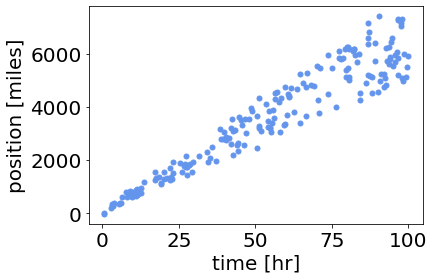

In [26]:
# Using the pandas plot.scatter
cheetah_df.plot.scatter('time [hr]', 'position [miles]', s=100, marker='.', color="cornflowerblue")
plt.show()


We will use [scikit-learn](https://scikit-learn.org/stable/) as for KNN, it contains a function called [linear regression](https://scikit-learn.org/stable/modules/linear_model.html). 

The function we will use is called <code> LinearRegression() </code>. 

Let's start by creating a **training** and **testing** data set from the orginal data.

In [36]:
X = cheetah_df['time [hr]'].values.reshape(-1, 1)
print(X.shape)
y = cheetah_df['position [miles]'].values.reshape(-1, 1)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

(200, 1)
(200, 1)


### Fitting the Cheetah position in time data to a line

In [37]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [39]:
# Use model to fit to the training data, the X values are times and the Y values are positions of the Cheetah
regr.fit(X_train, y_train)
beta1 = regr.coef_[0][0]
beta0 = regr.intercept_[0]

# Print the slope m and intercept b
print('Scikit learn - Slope: ', beta1 , 'Intercept: ', beta0 )

Scikit learn - Slope:  63.368822235640636 Intercept:  172.40371329411846


Let's **predict** the values of $y$ in the test set using our fitted parameters.

In [40]:
# From the equation
Y_calc_test_2 = beta1*X_test + beta0

# Another way to get this is using the regr.predict function
Y_calc_test = regr.predict(X_test)

Let's create a graphical visualization of the fitted values respect to the exact values

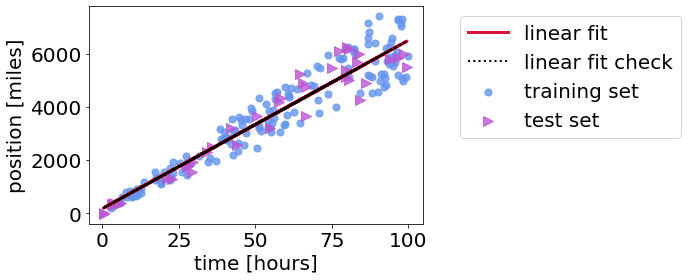

In [41]:
# Lets plot exact positions respect to the time values using a scatter plot
plt.scatter(X_train, y_train, s=50, marker='o', color="cornflowerblue", alpha=0.8, label="training set")
plt.scatter(X_test, y_test, s=100, marker='>', color="mediumorchid", alpha=0.8, label="test set")
plt.xlabel('time [hours]')
plt.ylabel('position [miles]')

# Now we compare to our fit by plotting both Y_cal and Y_calc_2 respect to time 
plt.plot(X_test, Y_calc_test, color='crimson',linewidth=3, label='linear fit')
plt.plot(X_test, Y_calc_test_2,':', color='black',linewidth=2, label='linear fit check')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
plt.show()

## 3. How much error are we making? 

### Accuracy of the coefficient estimates

We can look at the standard error, which one can derive and find to be

$$\text{SE}(\hat{\beta}_0)^2=\sigma^2\left[\frac{1}{N}+\frac{\bar{x}^2}{\sum_{i=1}^N(x_i-\bar{x})^2}\right]\;\;\;\;\sf{eq. 7}$$
$$\text{SE}(\hat{\beta}_1)^2=\frac{\sigma^2}{\sum_{i=1}^N(x_i-\bar{x})^2}\;\;\;\;\;\sf{eq. 8}$$

and $\sigma^2=\text{Var}(\epsilon)$. Here $\sigma^2$ is unknown but usually estimated from the data and in this case defined as the residual standard error, RSE:

$$\sigma \equiv \text{RSE}= \sqrt{\frac{\text{RSS}}{N-2}}\;\;\;\;\;\sf{eq. 9}$$

with RSS the residual sum of squares, i.e.

$$\text{RSS} = \sum_{i=1}^{N} \left(y_i - \hat{y}(x_i)\right)^2\;\;\;\;\;\sf{eq. 10}$$

we can normalize the RSS by the number of points N to retrieve the MSE as a metric of error of our fit. 

In [42]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, Y_calc_test))

Mean squared error: 264547.33


Another way to measure error is the regression score, $R^2$. $R^2$ is generally defined as the ratio of the total sum of squares $\text{TSS} $ to the residual sum of squares $\text {RSS}$:


$$R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}\;\;\;\;\sf{eq.11}$$

with 

$$\text{TSS}=\sum_{i=1}^N \left(y_i-\bar{y}\right)^2\;\;\;\;\sf{eq.12}$$

The best value of $R^2$ is 1 but it can also take a negative value if the error is large.

See all the different regression metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [43]:
# Print the coefficient of determination - 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, Y_calc_test))

Coefficient of determination: 0.94


## 4. Bias and Variance

We used a part of the data to fit our line - **_training_** data - and the rest to validate it - **_test_** data. At that point, the <code> predict() </code> function would have predicted previoulsy unseen positions. In the case when a subset of training data is used to find the parameters of the model we refer to the model as *_trained_* once the optimal values of the parameters have been determined.

Here, we are interested in evaluating the accuracy of the trained model when it predicts data from the test dataset. As we saw in lecture this morning, the error can be divided in to an **_irreducible_** and **_reducible_** part. 

Recall that the **_reducible error_** of the model , i.e. the error which comes from the mismatch of the model estimator function $\hat{y}=\hat{\beta}_1x+\hat{\beta}_0$ respect to the exact data can be broken down into **_bias_** and **_variance_**. Let's see what these mean when looking at the problem of the Cheetah. 


### 4.1  Variance

Let's go back to our Cheetah problem and train the model on three different sets of training points


In [44]:
# Define three datasets from the original set by selecting a range of values using the np.argwhere() function

# Search for positions in each numpy array where the values are in a specific range of time e.g. time < 35 hr
indices_test = [ind[0] for ind in np.argwhere(X <= 35)]
indices1 = [ind[0] for ind in np.argwhere((X > 35) & (X < 50))]
indices2 = [ind[0] for ind in np.argwhere((X >= 50) & (X < 70))]
indices3 = [ind[0] for ind in np.argwhere(X >= 70)]

# Define the three training dataset and testing datasets by using the indices 
X1_train = X[indices1] 
Y1_train = y[indices1] 
X2_train = X[indices2]
Y2_train = y[indices2]
X3_train = X[indices3]
Y3_train = y[indices3]

X_test = X[indices_test]
Y_test = y[indices_test]


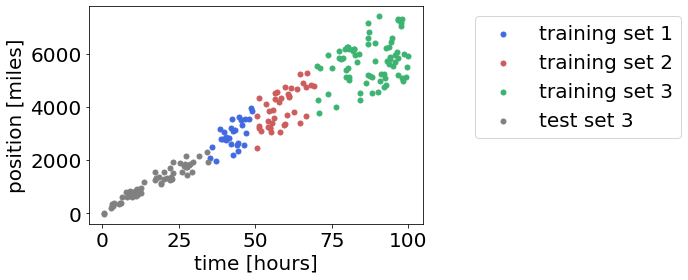

In [45]:
# Let's plot the three training sets and the test set
plt.scatter(X1_train, Y1_train, s=100, marker='.', color="royalblue", label="training set 1")
plt.scatter(X2_train, Y2_train, s=100, marker='.', color="indianred", label="training set 2")
plt.scatter(X3_train, Y3_train, s=100, marker='.', color="mediumseagreen", label="training set 3")
plt.scatter(X_test, Y_test, s=100, marker='.', color="grey", label="test set 3")
plt.xlabel('time [hours]')
plt.ylabel('position [miles]')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
plt.show()

Now we will carry out linear regression on each of these three training sets


In [46]:
regr1 = linear_model.LinearRegression()
regr1.fit(X1_train, Y1_train)

regr2 = linear_model.LinearRegression()
regr2.fit(X2_train, Y2_train)

regr3 = linear_model.LinearRegression()
regr3.fit(X3_train, Y3_train)

# These are simply beta_1 and beta_0 for each fit
m1 = regr1.coef_[0][0]
b1 = regr1.intercept_[0]

m2 = regr2.coef_[0][0]
b2 = regr2.intercept_[0]

m3 = regr3.coef_[0][0]
b3 = regr3.intercept_[0]

In [47]:
# Let's see how well they fit/predict the total dataset (note that usually we would only look at the test set here)
Y_calc_1 = regr1.predict(X_test)
Y_calc_2 = regr2.predict(X_test)
Y_calc_3 = regr3.predict(X_test)

Let's visualize the fitted values using our trained models and compare to the average fit


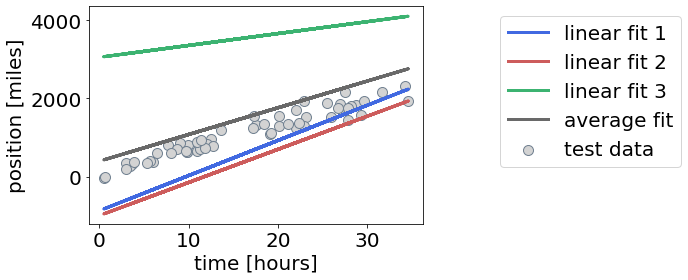

In [48]:
# Lets plot exact positions respect to the time values using a scatter plot
plt.scatter(X_test, Y_test, s=100, marker='o', facecolors='lightgrey', edgecolors='slategrey', label="test data")
plt.xlabel('time [hours]')
plt.ylabel('position [miles]')

# Compute the average calculated position
Y_calc_ave =  ( Y_calc_1 + Y_calc_2 + Y_calc_3 ) / 3

# Now we compare to our fit by plotting both Y_cal and Y_calc_2 respect to time 
plt.plot(X_test, Y_calc_1, color='royalblue',linewidth=3, label='linear fit 1')
plt.plot(X_test, Y_calc_2, color='indianred',linewidth=3, label='linear fit 2')
plt.plot(X_test, Y_calc_3, color='mediumseagreen',linewidth=3, label='linear fit 3')
plt.plot(X_test, Y_calc_ave, color='dimgrey',linewidth=3, label='average fit')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
plt.show()

#### Question 
Why do you think each linear fit has a different slope and intercept?


In the plot we see that each trained model has a different slope and intercept. The average fit is shown in grey. The difference between what one of the trained model predicts and the average model prediction is what we call the **_variance_**.

The variance is the amount by which the prediction will change if different subsets of the training data sets are used. We generally want to have a low variance as that ensure that our model is not sensitive to small fluctuations in the dataset.

Large variance occurs when the model performs well on the training dataset but does not do well on the test dataset.

If we use more complex models to fit, for example polynomials, that will generally lead to a larger variance.

### 4.2 Bias

Now, let's imagine that we are given the true universal Cheetah position function, lets call it <code> true_cheetah </code> we define it below

```
def true_cheetah(t):
    return 63.64 * t +  155.03
```

In [49]:
def true_cheetah(t):
    return 63.64 * t +  155.03

How well are we doing in terms of our prediction error respect to the true values? Are we biased? Let's visualize our results

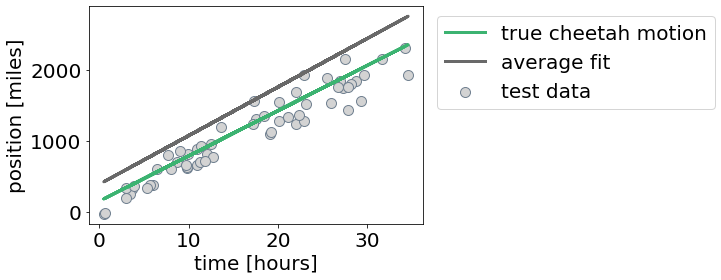

In [50]:
plt.plot(X_test, true_cheetah(X_test), color='mediumseagreen',linewidth=3, label='true cheetah motion')
plt.plot(X_test, Y_calc_ave, color='dimgrey',linewidth=3, label='average fit')
plt.scatter(X_test, Y_test, s=100, marker='o', facecolors='lightgrey', edgecolors='slategrey', label="test data")
plt.xlabel('time [hours]')
plt.ylabel('position [miles]')
plt.legend(bbox_to_anchor=(1.9, 1), loc='upper right')
plt.show()

We see that our model is biased, indeed our average fit model seems to predict with a **_bias_** error respect to the true cheetah motion. 

However, if we increased the number of samples over which we averaged, we would eventually get the exact population regression line and exact values of $\beta_0$ and $\beta_1$. Indeed ordinary least mean square optimization is **unbiased** - there is no tendency to systematically over or under estimate the true parameters. 

<div>
<img src="attachment:cheetah_over_underfitting.png" align=left width="400"/>
</div>



<div>
<img src=https://drive.google.com/uc?export=view&id=1DXLgVKjzBrofSPtxtNcVb9Lf_FbUMcKe width="500">
</div>

We usually want to find a sweet spot which minimizes both bias and variance. As we increase complexity, for instance by using a polynomial fit, our bias goes down however variance increases. Similarly for a very simple model the bias is large while the variance is small. We can see this graphically in the sketch copied below



<div>
<img src=https://drive.google.com/uc?export=view&id=1phnDnjjGJ8twf7h9JKS3TbbN5QlBFj9o width="500">
</div>

### Next time - Beyond a single input feature

The **speed** or velocity of the Cheetah (the dependent variable v) could depend on:
* his/her **energy** (independent variable E) that day
* how well the Cheetah **slept** the night before (independent variable sleep, S) 
* whether she/he was well **fed** (independent variable, F) 
* how much he or she has been **training** recently (independent variable, T)
